In [266]:
import numpy as np
from astropy import constants as const
from astropy.constants import iau2015 as const_iau
from astropy import units as u
import matplotlib.pyplot as plt

In [305]:
# Values from Lacour+2022
ab = 9.93 * u.au
ac = 2.68 * u.au

ab_err_lower = 0.03 * u.au
ab_err_upper = 0.03 * u.au
ac_err_lower = 0.02 * u.au
ac_err_upper = 0.02 * u.au

Ms = 1.75 * u.M_sun

Ms_err_lower = 0.02 * u.M_sun
Ms_err_upper = 0.03 * u.M_sun

Mb = 11.90 * u.M_jup
Mc = 8.89 * u.M_jup

Mb_err_lower = 3.04 * u.M_jup
Mb_err_upper = 2.93 * u.M_jup
Mc_err_lower = 0.75 * u.M_jup
Mc_err_upper = 0.75 * u.M_jup

In [306]:
const_iau.GM_jup

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal Jupiter mass parameter' value=1.2668653e+17 uncertainty=0.0 unit='m3 / s2' reference='IAU 2015 Resolution B 3'>

In [307]:
const_iau.GM_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar mass parameter' value=1.3271244e+20 uncertainty=0.0 unit='m3 / s2' reference='IAU 2015 Resolution B 3'>

In [338]:
# function calculating period using Kepler III
def Tfct(a, Ms, Mi, uses_astropyunits = True):
    if uses_astropyunits:
        res = np.sqrt((4 * np.pi**2 * a**3)/(const.G * (Ms + Mi)))
    else: 
        res = np.sqrt((4 * np.pi**2 * (a*u.au)**3)/(const.G * ((Ms * u.M_sun) + (Mi * u.M_jup))))
    return res

# function calculating period using Kepler III and IAU's values for G*M
def Tfct_iau(a, Ms, Mi):
    res = np.sqrt((4 * np.pi**2 * (a*u.au)**3)/((Ms * const_iau.GM_sun) + (Mi * const_iau.GM_jup)))
    return res

In [339]:
u.au.to('meter')

149597870700.0

In [350]:
#period of b

In [352]:
Tfct(ab, Ms, Mb)

<Quantity 18133300.35228948 AU(3/2) kg(1/2) s / (m(3/2) solMass(1/2))>

In [353]:
print(Tfct(ab, Ms, Mb).to('year'))

23.578059041904034 yr


In [354]:
#period of c

In [355]:
Tfct(ac, Ms, Mc)

<Quantity 2544542.43364485 AU(3/2) kg(1/2) s / (m(3/2) solMass(1/2))>

In [356]:
print(Tfct(ac, Ms, Mc).to('year'))

3.308574311875535 yr


In [357]:
print(Tfct(ac, Ms, Mc).to('day'))

1208.4567674125392 d


In [362]:
#hmm that value is kinda off from the reported 1221 days

In [281]:
#Errorbar estimate..

In [228]:
# hacky function which creates an asymetric gaussian (should be good enough for this application)
def asym_norm(mu, s_lower, s_upper):
    current_res = np.nan
    counter = 0
    while np.isnan(current_res):
        #print(counter)
        rand = np.random.randn(1)[0] #draw random number from normal distr. 
        if rand < 0:
            randu = np.random.uniform(0,1,1)
            normfac = s_lower/s_upper #correct for jump 
            if randu < normfac.value:
                current_res = mu + rand * s_lower
                current_res = current_res
            else: current_res = np.nan
        elif rand > 0:
            current_res = mu + rand * s_upper
            current_res = current_res
        res = current_res
        counter += 1
    return res

In [ ]:
asym_norm(Ms, Ms_err_lower, Ms_err_upper)

In [242]:
# create a Ms distribution

In [239]:
Ms_sample = np.array([asym_norm(Ms, Ms_err_lower, Ms_err_upper).value
          for i in range(500000)])

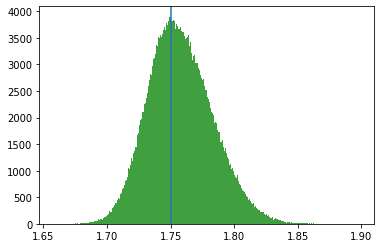

In [240]:
n, bins, patches = plt.hist(Ms_sample, 500, density=False, facecolor='g', alpha=0.75)
plt.axvline(Ms.value)

In [243]:
Mc_sample = np.array([asym_norm(Mc, Mc_err_lower, Mc_err_upper).value
          for i in range(500000)])
#Mc_sample_new = np.array(Mc_sample)[~np.isnan(Mc_sample)]

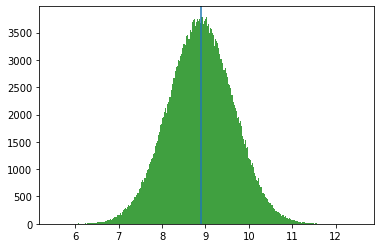

In [245]:
n, bins, patches = plt.hist(Mc_sample, 500, density=False, facecolor='g', alpha=0.75)
plt.axvline(Mc.value)

In [246]:
ac_sample = np.array([asym_norm(ac, ac_err_lower, ac_err_upper).value
          for i in range(500000)])
#ac_sample_new = np.array(ac_sample)[~np.isnan(ac_sample)]

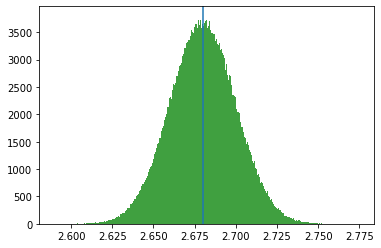

In [247]:
n, bins, patches = plt.hist(ac_sample, 500, density=False, facecolor='g', alpha=0.75)
plt.axvline(ac.value)

In [252]:
tmp = Tfct(ac_sample, Ms_sample, Mc_sample, uses_astropyunits = False).to('day').value

In [253]:
np.percentile(tmp, 50)

1205.8536937525223

In [255]:
np.percentile(tmp, 14)

1188.5117589797574

In [256]:
np.percentile(tmp, 85)

1222.4281530396736

In [ ]:
# I am therefore getting 1206 + 17 - 17

In [360]:
(1205 - 1221)/np.sqrt(15**2+17**2)

-0.7057297462259694

In [361]:
#it's consistent within 1 sigma with the lacour value but still surprisingly off to me

In [149]:
tmp = Tfct_no_u(ac_sample, Ms_sample, Mc_sample).to('day').value

In [150]:
tmp2 = np.array(tmp)[~np.isnan(tmp)]

In [151]:
np.percentile(tmp2, 50)

1205.8841655274882

In [154]:
Tfct(ac, Ms, Mc).to('day').value

1208.4567674125392